## Working with arrays of Compartments
COPASI allows working with arrays of compartments, that is taking a model that is set up, and multiplying it either in a linear chain, or in an rectangular array. This example shows how to do that using basico. We start with the usual imports:

In [1]:
from basico import * 

now we import the brusselator example model

In [2]:
dm = load_example('brusselator')

and obviouslky, we can run time courses just as usual: 

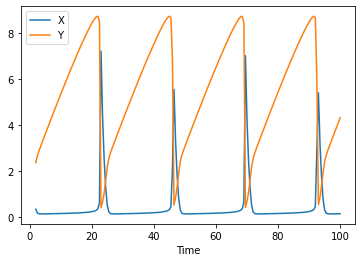

In [3]:
data = run_time_course()
data.plot();

For initialization it is useful, to add events to the model. The parameters are: 

* name
* trigger expression
* array of arrays for assignments, with the inner array containing a target, and an expression what to assign. 

for example the following would add an event `e2` that triggers at time 10, and assigns 10 to `X`

In [4]:
add_event('e0', 'Time > 30', [['X', '10']]);

to display what events we have use `get_events()`

In [5]:
get_events()

,trigger,delay,assignments,key,sbml_id
name,,,,,
e0,Time > 30,,"[{'target': '[X]', 'expression': '10'}]",Event_0,


so running the time course again, we do see that at time 30, the event is triggered: 

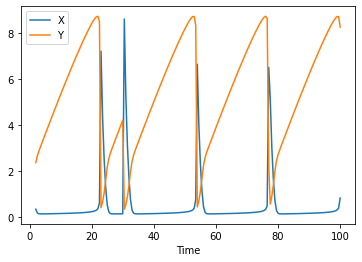

In [6]:
run_time_course().plot();

### Linear arrays of compartments
now lets run this model in a linear chain of 15 cells, allowing the species X and Y to diffuse linearly between them, with diffusion coefficients 0.16 and 0.08 respectively. We also remove the existing compartment afterwards, as it will not be part of the linear chain: 

In [7]:
create_linear_array(15, ['X', 'Y'], [0.16, 0.8], delete_template=True)

now we have many more species, compartments, and reactions, all parameterized exactly as the template model was

In [8]:
print(overview())
get_species().head()

Name:           The Brusselator
# Compartments: 15
# Species:      90# Parameters:   2# Reactions:    88# Events:       1


,compartment,type,unit,initial_concentration,initial_particle_number,initial_expression,expression,concentration,particle_number,rate,particle_number_rate,key,sbml_id
name,,,,,,,,,,,,,
X,compartment[0],reactions,mmol/ml,2.999996,1.806640e+21,,,NaN,NaN,0.0,0.0,Metabolite_6,
E,compartment[0],fixed,mmol/ml,0.000000,0.000000e+00,,,NaN,NaN,0.0,0.0,Metabolite_7,
B,compartment[0],fixed,mmol/ml,2.999996,1.806640e+21,,,NaN,NaN,0.0,0.0,Metabolite_8,
D,compartment[0],fixed,mmol/ml,0.000000,0.000000e+00,,,NaN,NaN,0.0,0.0,Metabolite_9,
Y,compartment[0],reactions,mmol/ml,2.999996,1.806640e+21,,,NaN,NaN,0.0,0.0,Metabolite_10,


lets simulate again: 

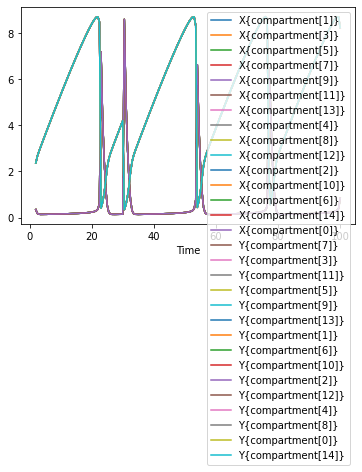

In [9]:
data = run_time_course()
data.plot();

Seeing all these lines plotted over each other might not be too helpful, so we can also plot this as a clor mesh, with the time on the x axis, and the individal created compartments along the y axis. 

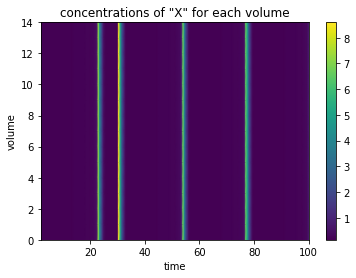

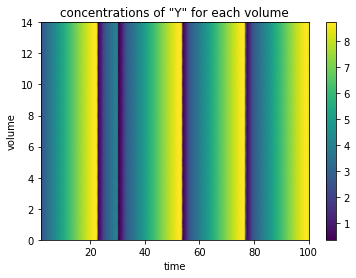

In [10]:
plot_linear_time_course(data, 'compartment');

### Creating 2D array of compartments
the same can be done by createing a rectangular array of compartments. Note that this results in quickly getting large amounts of model variables, so it might prove prohibitive to be used in numbers. So i'll start over, loading the model again (as i don't want the linear chain anymore)

In [ ]:
dm = load_example('brusselator')
create_rectangular_array(15, 15, ['X', 'Y'], [0.16, 0.8], delete_template=True)
print(overview())

Lots of variables indeed. So simulation will take a bit longer. But before we come to that, i would like to change the concentration of X at time 10 of the simulation, just so that we don't just use uniform values (that would be boring to look at. So i add the events as before: 

In [ ]:
add_event('change_x', 'Time > 10', [['X{compartment[2,2]}', '10'], 
                                    ['X{compartment[2,3]}', '10'], 
                                    ['X{compartment[3,2]}', '10'], 
                                    ['X{compartment[3,3]}', '10']
                                   ])

In [ ]:
data = run_time_course(duration=100, start_time=0)

plotting all times of the time course might not be too interesting, so instead i select plots only at specific times. I also override the min / max scaling of the plots, to the range between 0 and 10, if those are not given the data will be scaled to each min / max value. 

In [ ]:
plot_rectangular_time_course(data, times=[10.5, 30 , 60, 90], min_range=0, max_range=10);

To display it as animation we'll need an extra import, and you'll need to have ffmpeg installed

In [ ]:
from IPython.display import HTML
HTML(animate_rectangular_time_course(data, metab='Y', min_range=0, max_range=10).to_html5_video())